In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
'''
传感器 1/2.7”CMOS  
传感器尺寸 w*h=5.27mm*3.96mm
焦距 6mm
分辨率 1280*1024
'''
SENSOR_W = 5.27
SENSOR_H = 3.96
F = 6
RESOLUTION_W = 1280
RESOLUTION_H = 1024

# 内参矩阵相关参数
u_0 = RESOLUTION_W/2
v_0 = RESOLUTION_H/2
dX = SENSOR_W/RESOLUTION_W
dY = SENSOR_H/RESOLUTION_H
f_u = F/dX
f_v = F/dY

# 内参矩阵
Intrinsic_matrix = [[f_u,0,u_0,0],
[0,f_v,v_0,0],
[0,0,1,0]]

# 三位平面点坐标
coordinate_3D = np.array([[0,0,2,1],[0,0.5,2,1],[0.5,0.5,2,1],[0.5,0,2,1]])
coordinate_2D = []
x = []
y = []
for b in coordinate_3D:
    a = np.matmul(Intrinsic_matrix,b)
    x.append(a[0])
    y.append(a[1])
    coordinate_2D.append(a[:2])

# 得出结果坐标
print(coordinate_2D)


[array([1280., 1024.]), array([1280.        , 1799.75757576]), array([2008.65275142, 1799.75757576]), array([2008.65275142, 1024.        ])]


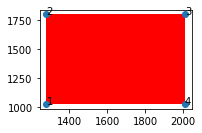

In [50]:
# 绘制图形
a = x
b = y

plt.subplot(221)
plt.plot(a, b, 'o')
plt.fill(a, b, 'r')
for index, item in enumerate(zip(a, b), 1):
    plt.text(item[0], item[1], index)
plt.show()
